In [72]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('df_feature_selected.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()
# df.shape

payment  account  privat  merchant  plan  fund  mobil devic  transact  \
0     0.00     0.01     0.0      0.00  0.04   0.0         0.99      0.00   
1     0.00     0.00     0.0      0.00  0.00   0.0         0.14      0.00   
2     0.00     0.00     0.0      0.00  0.00   0.0         0.00      0.00   
3     0.14     0.04     0.0      0.00  0.00   0.0         0.85      0.01   
4     0.02     0.14     0.0      0.17  0.00   0.0         0.46      0.32   

   card  cryptocurr  ...   cash  updat  debit  flowchart  specifi  wirelessli  \
0  0.00         0.0  ...   0.00   0.04   0.00        0.0     0.01        0.01   
1  0.00         0.0  ...   0.00   0.01   0.00        0.0     0.00        0.00   
2  0.00         0.0  ...   0.00   0.04   0.00        0.0     0.00        0.00   
3  0.03         0.0  ...   0.00   0.00   0.01        0.0     0.00        0.00   
4  0.05         0.0  ...   0.03   0.01   0.01        0.0     0.01        0.00   

   exceed  altern  accord  Type  
0     0.0     0.0    0.01     0  
1     0.0     0.0    0.00     0  
2     0.0     0.0    0.01     0  
3     0.0     0.0    0.00     0  
4     0.0     0.0    0.00     0  

[5 rows x 301 columns]

In [73]:
X = df.iloc[:,:300].values
y = df.iloc[:,300].values

In [74]:
len(df.columns)

301

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from keras.utils import np_utils
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) 
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)  

In [79]:
dummy_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [62]:
classifier = Sequential()  
# units is the number of neurons, input_dim is the number of inputs, netron is usually 2/3 or 1/2 of the inputs 
classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu', input_dim = 300))   
# add dropout rate to avoid overfitting 
classifier.add(Dropout(p = 0.5))
# Adding the second hidden layer, Initializations define the way to set the initial random weights of Keras layers.
classifier.add(Dense(units = 75, kernel_initializer = 'uniform', activation = 'relu'))   
classifier.add(Dropout(p = 0.5))
# Adding the output layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid')) 
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_data = (X_test, y_test))

C:\Users\lzhan41\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  after removing the cwd from sys.path.
C:\Users\lzhan41\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  import sys


Train on 244 samples, validate on 62 samples
Epoch 1/100
244/244 [==============================] - 0s 2ms/step - loss: 0.6194 - acc: 0.8229 - val_loss: 0.4468 - val_acc: 0.8889
Epoch 2/100
244/244 [==============================] - 0s 205us/step - loss: 0.3790 - acc: 0.8889 - val_loss: 0.3428 - val_acc: 0.8889
Epoch 3/100
244/244 [==============================] - 0s 147us/step - loss: 0.3360 - acc: 0.8889 - val_loss: 0.3126 - val_acc: 0.8889
Epoch 4/100
244/244 [==============================] - 0s 147us/step - loss: 0.3082 - acc: 0.8907 - val_loss: 0.2721 - val_acc: 0.8978
Epoch 5/100
244/244 [==============================] - 0s 143us/step - loss: 0.2659 - acc: 0.8975 - val_loss: 0.2232 - val_acc: 0.9140
Epoch 6/100
244/244 [==============================] - 0s 143us/step - loss: 0.2211 - acc: 0.9139 - val_loss: 0.1880 - val_acc: 0.9337
Epoch 7/100
244/244 [==============================] - 0s 143us/step - loss: 0.1839 - acc: 0.9290 - val_loss: 0.1630 - val_acc: 0.9427
Epoch 8/100


Epoch 61/100
244/244 [==============================] - 0s 127us/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.2706 - val_acc: 0.9480
Epoch 62/100
244/244 [==============================] - 0s 131us/step - loss: 0.0036 - acc: 0.9995 - val_loss: 0.2787 - val_acc: 0.9444
Epoch 63/100
244/244 [==============================] - 0s 135us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2828 - val_acc: 0.9480
Epoch 64/100
244/244 [==============================] - 0s 131us/step - loss: 0.0033 - acc: 0.9995 - val_loss: 0.2835 - val_acc: 0.9480
Epoch 65/100
244/244 [==============================] - 0s 118us/step - loss: 0.0040 - acc: 0.9995 - val_loss: 0.2759 - val_acc: 0.9498
Epoch 66/100
244/244 [==============================] - 0s 123us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.2778 - val_acc: 0.9498
Epoch 67/100
244/244 [==============================] - 0s 127us/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.2766 - val_acc: 0.9498
Epoch 68/100
244/244 [==========================

In [81]:
# history.history
# number of params is the number of weights: input is I, first hidden layer number of neurons: H1, second layer number of neurons: 
#H2, output is O, number of weights = (I+1)H1 + (H1+1)H2 + (H2+1)O 
classifier.summary() 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 75)                11325     
_________________________________________________________________
dropout_8 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 9)                 684       
Total params: 57,159
Trainable params: 57,159
Non-trainable params: 0
_________________________________________________________________


In [64]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

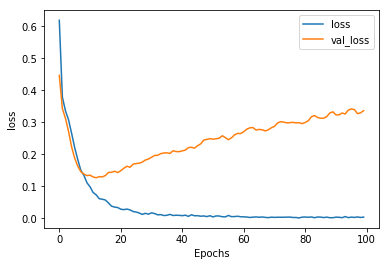

In [65]:
plot_graphs(history, 'loss') 

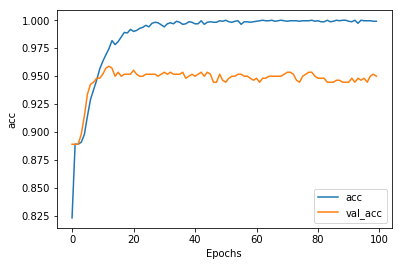

In [66]:
plot_graphs(history,'acc')